# Data Wrangling

We continue our discussion on Pandas and explore more examples of using Python and Pandas to collect and manipulate data.

<sub>NOTE: Much of the material below is either derived from, or copied from, one of the courses recommended texts "Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython" by Wes McKinney. Be aware though that any material taken from the text may have been updated, changed, and new material added</sub>


## Bitlinks

Bitly was once very popular way of sharing long URL's in twitter mentions, and other means of communication. It's still used extensively, but not to the level it once was. Nevertheless, it can still be a userful source of infofmation. 

In [401]:
from IPython.core.display import HTML
from IPython.display import display
HTML("<iframe src=https://dev.bitly.com/get_started.html width=980 height=400></iframe>")

### usa.gov data from bit.ly

In 2011, URL shortening service bit.ly partnered with the United States government website usa.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil . 

This project was maintained at https://github.com/usagov/1.USA.gov-Data, but was shutdown on July 2016. 


In [402]:
open("usagov_bitly.txt").readlines()[0:2]

['{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n',
 '{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n']

From this dump of the first 2 lines, we can see that this looks like it's in json format. 

As we have already seen, Python offers a number of modules that allow us to easily manage json data. We will use the json library. 

In [403]:
import json
records = [json.loads(line) for line in open("usagov_bitly.txt")]
records[1:3]

[{'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'cy': 'Provo',
  'g': 'mwszkS',
  'gr': 'UT',
  'h': 'mwszkS',
  'hc': 1308262393,
  'hh': 'j.mp',
  'l': 'bitly',
  'll': [40.218102, -111.613297],
  'nk': 0,
  'r': 'http://www.AwareMap.com/',
  't': 1331923249,
  'tz': 'America/Denver',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php'},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)',
  'al': 'en-US',
  'c': 'US',
  'cy': 'Washington',
  'g': 'xxr3Qb',
  'gr': 'DC',
  'h': 'xxr3Qb',
  'hc': 1331919941,
  'hh': '1.usa.gov',
  'l': 'bitly',
  'll': [38.9007, -77.043098],
  'nk': 1,
  'r': 'http://t.co/03elZC4Q',
  't': 1331923250,
  'tz': 'America/New_York',
  'u': 'http://boxer.senate.gov/en/press/releases/031612.cfm'}]

In [404]:
records[0]['tz']

'America/New_York'

Now, if we iterature through this data to find tz records, we may be inclinded to try the following:

In [405]:
# time_zones = [rec['tz'] for rec in records]

... but, this would produce and error as not all records seem to have the tz key. We can see this if we iterature through and print the results to the screen

for rec in records:
    print(rec['tz'])

Obviously, we need to manage how to handle records where there is not tz key. Let's remove the instances....

In [406]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Now, let's say we want to analyze where the traffic to .gov sites is coming from.

Let's use timezone as a proxy indicator for location and count the occurances of a given timezone.

In [407]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [408]:
tz_counts = get_counts(time_zones)

In [409]:
tz_counts['America/New_York']

1251

Let's write a functiont to display the first n number of the tope timezones found in the data...


In [410]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:n]

In [411]:
top_counts(tz_counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

## Counting with Pandas

As we have already seen, the main data structures in Pandas are Series, DataFrame and Panel. Let's take our records data structure (a list of dictionaries) and load this into a Pandas DataFrame...

as a reminder... let's look at the content of the first 10 records

In [412]:
records[:10]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'al': 'en-US,en;q=0.8',
  'c': 'US',
  'cy': 'Danvers',
  'g': 'A6qOVH',
  'gr': 'MA',
  'h': 'wfLQtf',
  'hc': 1331822918,
  'hh': '1.usa.gov',
  'l': 'orofrog',
  'll': [42.576698, -70.954903],
  'nk': 1,
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  't': 1331923247,
  'tz': 'America/New_York',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'cy': 'Provo',
  'g': 'mwszkS',
  'gr': 'UT',
  'h': 'mwszkS',
  'hc': 1308262393,
  'hh': 'j.mp',
  'l': 'bitly',
  'll': [40.218102, -111.613297],
  'nk': 0,
  'r': 'http://www.AwareMap.com/',
  't': 1331923249,
  'tz': 'America/Denver',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php'},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

Now, let's load this data structure (which as we seen from the above output, is a list of dictionaries) and display the first 10 records of the DataFrame.

In [413]:
from pandas import DataFrame, Series
import pandas as pd

df = DataFrame(records)
display(df.head(10))

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


Note how Pandas addresses the problem of missing data. 

When we think of "missing data", there are two instances that we find. The first is that there is a field defined /identified but there is no value in this field. This is blank data. But there are times when there is no variable as all, and in such instances, we interpret this as NA (not available).

In Pandas DataFrames, we see "blank" values as simply field with no value BUT, for missing values, we see these represented as NaN (Not a number).

So, for any of our records that have a tz field but have nothing in it, the field will simply display as blank -- nothing in it. On the other hand, any records that don't have a tz field will display a NaN. 

NOTE: You may ask, why not the None value?  As we have seen in python, a null is represented as a none value. This represents "nothingness". So, why NaN rather than none? 

NaN is actually a standard (https://en.wikipedia.org/wiki/IEEE_floating_point) to is applies across languages. In this, a value that doesn't exist is represented as Nan. Though it's not clear why (somewhere, whomever decided this in Pandas may have explained the inspiration for this), we can assume that it made sense to the Pandas developers to implement NaN. We can also explain this through the need to have two types of "nothingness". None represents the lack of a Python object, while NaN represents the lack of a value. 


Now, let's look at which timezones most of the access to the government websites were from:

NOTE: `value_counts()` is a method of the Series class (remember, a DataFrame is a data structure conisting of a number of columns of series data)

In [414]:
display(df['tz'].value_counts())

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Moscow                       10
Asia/Hong_Kong                      10
Europe/Helsinki          

But, as we saw from looking at previously, there are a number of records which don't have any tz value. How is this handled in a DatFrame? As mentioned previously, any missing value is loaded in the DataFrame as value NaN (not a number). Generally, any aggregration functions (such as value_counts()) will simply ignore NaNs. Under most circumstances, this is what we want (the alternative would be to throw and exception). But, what if the NaN's represented some information that you wanted to use in same way?

Let's look at how we can work with NaN's a little more.

Let's count the number of NaNs. To do this, we use  method called 'isnull'

In [415]:
df['tz'].isnull().sum()

120

But, notice, that is we count the number of Nan's (nulls) output from value_counts(), we get zero

In [416]:
df['tz'].value_counts().isnull().sum()

0

Now, how would we see a count of any missing timezones in our summary? 

We could use the `fillna()` to fill these NaN's with whatever value we wanted.

In [417]:
tz_counts=df['tz'].fillna('Missing').value_counts()

Now, when we look at the output, we seem the "missing" values are not included in our summary.

In [418]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Moscow                       10
Asia/Hong_Kong                      10
Europe/Helsinki          

Now, how would we make blank values known to us? We could do the following:

In [421]:
clean_tz= df['tz'].fillna('Missing')
clean_tz[clean_tz==''] = "Unkown"
tz_counts = clean_tz.value_counts()
tz_counts[:10]


America/New_York       1251
Unkown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

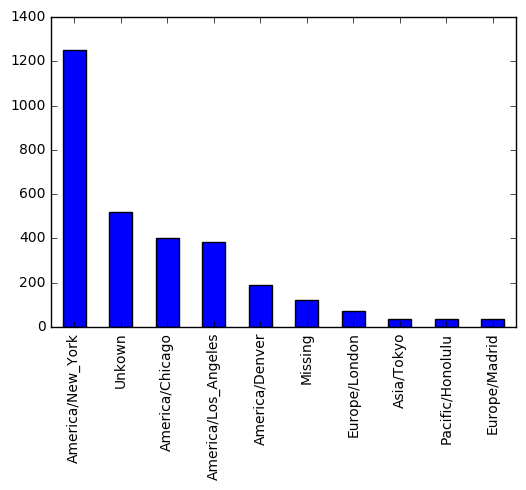

In [429]:
%matplotlib inline
tz_counts[:10].plot(kind='bar')

Or, if we wanted a horizontal view

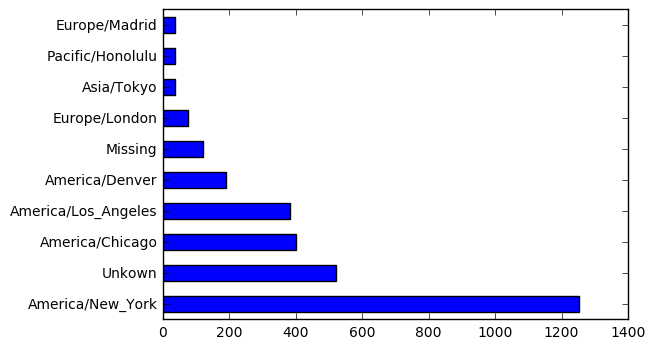

In [431]:
tz_counts[:10].plot(kind='barh')

## Summary of DataFrame Basics

We can access columns in a Pandas DataFrame as follows

* List the columns of the df

In [432]:
df.columns.values

array(['_heartbeat_', 'a', 'al', 'c', 'cy', 'g', 'gr', 'h', 'hc', 'hh',
       'kw', 'l', 'll', 'nk', 'r', 't', 'tz', 'u'], dtype=object)

* translate an  array datastructure to a list

In [433]:
df.columns.values.tolist()

['_heartbeat_',
 'a',
 'al',
 'c',
 'cy',
 'g',
 'gr',
 'h',
 'hc',
 'hh',
 'kw',
 'l',
 'll',
 'nk',
 'r',
 't',
 'tz',
 'u']

* access any one column of data (remember, each column is  a Series ), and any slice of rows from this columns

In [438]:
df.tz[:3]

0    America/New_York
1      America/Denver
2    America/New_York
Name: tz, dtype: object

In [439]:
df['tz'][:3]

0    America/New_York
1      America/Denver
2    America/New_York
Name: tz, dtype: object

In [441]:
df.a[3:5]

3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

Remember, we can use standard Python concepts and functions -- such as a list comprehension, and methods like spplit.


For instance, let's say we wanted to find a list of all browsers that accessed the site (we may want to know this to help guide website design)...

In [444]:
results = Series([x.split()[0] for x in df.a.dropna()]) # note, dropna() is a nice shortcut to remove any nan's
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

And then look at the first 10 most common browsers used to access the governemnt sites

In [445]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64